"""
# 📊 Data Preprocessing Notebook
**Authors:** Ines
**Status:** ✅ COMPLETED

⚠️ This notebook was executed on Local envirenment.
Preprocessing is complete. This is documentation only.

**Output:**
- 14,786 preprocessed images (128×128)
- freshClass_DS_preprocessed.csv
- All files saved on Google Drive
"""

In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [33]:
!dir C:\Users\admin\.kaggle



 Volume in drive C has no label.
 Volume Serial Number is CC9B-A413

 Directory of C:\Users\admin\.kaggle

11/11/2025  18:50    <DIR>          .
11/11/2025  18:48    <DIR>          ..
11/11/2025  18:29                66 kaggle.json
               1 File(s)             66 bytes
               2 Dir(s)  15,955,410,944 bytes free


In [3]:
!kaggle datasets list -s iris


ref                                                     title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
uciml/iris                                              Iris Species                                         3687  2016-09-27 07:38:05.440000         787778       4473  0.7941176        
himanshunakrani/iris-dataset                            Iris dataset                                         1006  2022-07-20 18:50:06.277000          77139        317  1.0              
arshid/iris-flower-dataset                              Iris Flower Dataset                                  1010  2018-03-22 15:18:06.097000         227726       1040  0.8235294        
vikrishnan/iris-dataset                                 Iris Data

In [35]:
!kaggle datasets download -d ryandpark/fruit-quality-classification


^C


In [37]:
import zipfile

In [39]:
with zipfile.ZipFile(r"C:\Users\admin\JUPYTER\fruit-quality-classification.zip", 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\admin\JUPYTER\fruit_quality_data")

KeyboardInterrupt: 

In [15]:
import os 
import pandas as pd 
import numpy as np

image_paths = []
labels = []

for root, dirs, files in os.walk(r"C:\Users\admin\JUPYTER\fruit_quality_data"):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))  

In [17]:
df = pd.DataFrame({"image_path": image_paths, "label": labels})
df.head()


,image_path,label
0,C:\Users\admin\JUPYTER\fruit_quality_data\Bad ...,Apple_Bad
1,C:\Users\admin\JUPYTER\fruit_quality_data\Bad ...,Apple_Bad
2,C:\Users\admin\JUPYTER\fruit_quality_data\Bad ...,Apple_Bad
3,C:\Users\admin\JUPYTER\fruit_quality_data\Bad ...,Apple_Bad
4,C:\Users\admin\JUPYTER\fruit_quality_data\Bad ...,Apple_Bad


In [19]:
print(len(df))

19526


In [21]:
print("\nNombre d'images par classe :")
print(df['label'].value_counts())


Nombre d'images par classe :
label
Pomegranate_Good    5940
Orange_Good         1216
Pomegranate_Bad     1187
Orange_Bad          1159
Guava_Good          1152
Apple_Good          1149
Apple_Bad           1141
Guava_Bad           1129
Banana_Good         1113
Lime_Good           1094
Banana_Bad          1087
Lime_Bad            1085
Banana               285
Lemon                278
Guava                148
Orange               125
Pomegranate          125
Apple                113
Name: count, dtype: int64


In [57]:
print("\nTypes de fichiers :")
print(df['image_path'].apply(lambda x: x.split('.')[-1]).value_counts())


Types de fichiers :
image_path
jpg    15819
JPG     3707
Name: count, dtype: int64


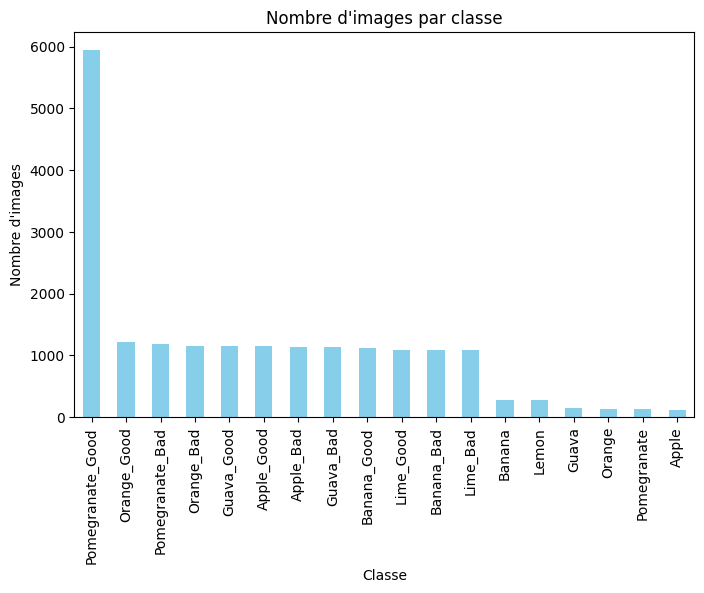

In [5]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue')

plt.title("Nombre d'images par classe")
plt.xlabel("Classe")
plt.ylabel("Nombre d'images")
plt.savefig("nbr d'image par classe ")


In [23]:
df['label_clean'] = df['label']

In [25]:
df['label'].value_counts()

label
Pomegranate_Good    5940
Orange_Good         1216
Pomegranate_Bad     1187
Orange_Bad          1159
Guava_Good          1152
Apple_Good          1149
Apple_Bad           1141
Guava_Bad           1129
Banana_Good         1113
Lime_Good           1094
Banana_Bad          1087
Lime_Bad            1085
Banana               285
Lemon                278
Guava                148
Orange               125
Pomegranate          125
Apple                113
Name: count, dtype: int64

In [27]:
df['label'] = df['label'].replace({
    'Lemon': 'Lime'
})
print(df['label'].value_counts())

label
Pomegranate_Good    5940
Orange_Good         1216
Pomegranate_Bad     1187
Orange_Bad          1159
Guava_Good          1152
Apple_Good          1149
Apple_Bad           1141
Guava_Bad           1129
Banana_Good         1113
Lime_Good           1094
Banana_Bad          1087
Lime_Bad            1085
Banana               285
Lime                 278
Guava                148
Orange               125
Pomegranate          125
Apple                113
Name: count, dtype: int64


In [29]:
df.loc[~df['label'].str.contains('_Good|_Bad'), 'label_clean'] = df['label'].apply(
    lambda x: x.split('_')[0] + '_Bad' if '_' not in x else x
)


In [31]:
df['label_clean'].value_counts()

label_clean
Pomegranate_Good    5940
Banana_Bad          1372
Lime_Bad            1363
Pomegranate_Bad     1312
Orange_Bad          1284
Guava_Bad           1277
Apple_Bad           1254
Orange_Good         1216
Guava_Good          1152
Apple_Good          1149
Banana_Good         1113
Lime_Good           1094
Name: count, dtype: int64

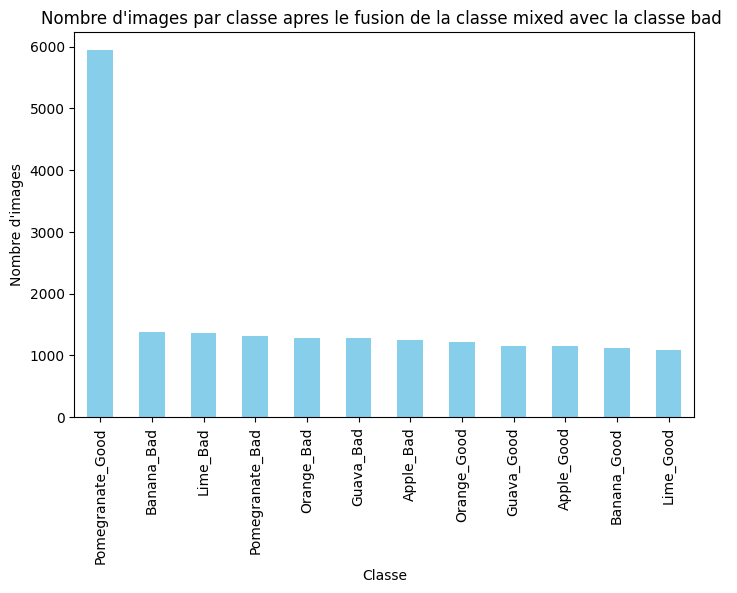

In [33]:
import matplotlib.pyplot as plt
df['label_clean'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue')

plt.title("Nombre d'images par classe apres le fusion de la classe mixed avec la classe bad ")
plt.xlabel("Classe")
plt.ylabel("Nombre d'images")
plt.savefig("nbr d'image par classe ")

## le sous echnatillonage 

In [35]:
df_pg = df[df['label_clean'] == 'Pomegranate_Good'].sample(1200, random_state=42)
df_rest = df[df['label_clean'] != 'Pomegranate_Good']

In [77]:
df_rest

,image_path,label,label_clean
0,C:\Users\admin\JUPYTER\fruit_quality_data\Bad ...,Apple_Bad,Apple_Bad
1,C:\Users\admin\JUPYTER\fruit_quality_data\Bad ...,Apple_Bad,Apple_Bad
2,C:\Users\admin\JUPYTER\fruit_quality_data\Bad ...,Apple_Bad,Apple_Bad
3,C:\Users\admin\JUPYTER\fruit_quality_data\Bad ...,Apple_Bad,Apple_Bad
4,C:\Users\admin\JUPYTER\fruit_quality_data\Bad ...,Apple_Bad,Apple_Bad
...,...,...,...
19521,C:\Users\admin\JUPYTER\fruit_quality_data\Mixe...,Pomegranate,Pomegranate_Bad
19522,C:\Users\admin\JUPYTER\fruit_quality_data\Mixe...,Pomegranate,Pomegranate_Bad
19523,C:\Users\admin\JUPYTER\fruit_quality_data\Mixe...,Pomegranate,Pomegranate_Bad
19524,C:\Users\admin\JUPYTER\fruit_quality_data\Mixe...,Pomegranate,Pomegranate_Bad


In [37]:
df= pd.concat([df_pg, df_rest])


In [43]:
df = df.drop('label', axis=1)


KeyError: "['label'] not found in axis"

In [45]:
df


,image_path,label_clean
18307,C:\Users\admin\JUPYTER\fruit_quality_data\Good...,Pomegranate_Good
17224,C:\Users\admin\JUPYTER\fruit_quality_data\Good...,Pomegranate_Good
15055,C:\Users\admin\JUPYTER\fruit_quality_data\Good...,Pomegranate_Good
17263,C:\Users\admin\JUPYTER\fruit_quality_data\Good...,Pomegranate_Good
14599,C:\Users\admin\JUPYTER\fruit_quality_data\Good...,Pomegranate_Good
...,...,...
19521,C:\Users\admin\JUPYTER\fruit_quality_data\Mixe...,Pomegranate_Bad
19522,C:\Users\admin\JUPYTER\fruit_quality_data\Mixe...,Pomegranate_Bad
19523,C:\Users\admin\JUPYTER\fruit_quality_data\Mixe...,Pomegranate_Bad
19524,C:\Users\admin\JUPYTER\fruit_quality_data\Mixe...,Pomegranate_Bad


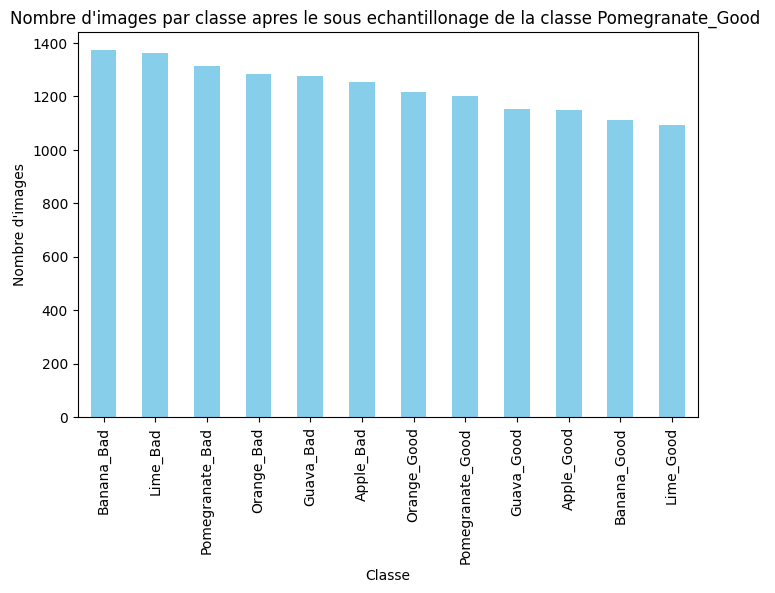

In [47]:
df['label_clean'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue')

plt.title("Nombre d'images par classe apres le sous echantillonage de la classe Pomegranate_Good ")
plt.xlabel("Classe")
plt.ylabel("Nombre d'images")
plt.savefig("nbr d'image par classe ")

In [71]:
df['image_path'].head()


18307    C:\Users\admin\JUPYTER\fruit_quality_data\Good...
17224    C:\Users\admin\JUPYTER\fruit_quality_data\Good...
15055    C:\Users\admin\JUPYTER\fruit_quality_data\Good...
17263    C:\Users\admin\JUPYTER\fruit_quality_data\Good...
14599    C:\Users\admin\JUPYTER\fruit_quality_data\Good...
Name: image_path, dtype: object

In [73]:
import os
print(os.path.exists(df['image_path'].iloc[0]))

import os
print(os.getcwd())


True
C:\Users\admin\JUPYTER


In [67]:
import os

df['image_path'] = df['image_path'].apply(lambda x: os.path.abspath(x))


In [75]:
from PIL import Image
import os

corrupt_images = []

for path in df['image_path']:
    try:
        with Image.open(path) as img:
            img.load()  # charge vraiment l’image (plus fiable que verify)
    except Exception as e:
        corrupt_images.append(path)
        # print(f"Erreur sur {path}: {e}")  # <- tu peux décommenter pour déboguer

print(f"Images corrompues détectées : {len(corrupt_images)}")


Images corrompues détectées : 0


In [ ]:
from PIL import Image
image_sizes = []
for path in df['image_path']:
    img = Image.open(path)
    image_sizes.append({
        'image_path': path,
        'width': img.width,
        'height': img.height
    })

# Convertir en DataFrame pour mieux visualiser
df_sizes = pd.DataFrame(image_sizes)
print(df_sizes.head())  # afficher les 5 premières
print("Total images:", len(df_sizes))

## redimension DES IMAGES :

In [79]:
import os
import numpy as np
import pandas as pd
from PIL import Image

output_dir = "resized_images"
os.makedirs(output_dir, exist_ok=True)

new_paths = []
new_labels = []

for i, (path, label) in enumerate(zip(df['image_path'], df['label_clean'])):
    try:
        img = Image.open(path).convert('RGB')
        img = img.resize((128, 128))  # redimensionnement
        new_path = os.path.join(output_dir, f"img_{i}.jpg")
        img.save(new_path)
        new_paths.append(new_path)
        new_labels.append(label)
    except Exception as e:
        print(f"Erreur sur {path}: {e}")
        continue  
df_resized = pd.DataFrame({
    'image_path': new_paths,
    'label': new_labels
})

df_resized.to_csv('dataset_resized.csv', index=False)

print(f"✅ Préprocessing terminé ! {len(df_resized)} images redimensionnées et sauvegardées.")
print("📁 Fichier sauvegardé : dataset_resized.csv")

✅ Préprocessing terminé ! 14786 images redimensionnées et sauvegardées.
📁 Fichier sauvegardé : dataset_resized.csv
